# Linear Networks From Scratch
(using torch.tensor and random)

In [ ]:
import torch
import matplotlib.pyplot as plt
import random

## Generating data

In [ ]:
def synthetic_data_generator(weight, bias, n_samples) :
  """Method to generate data for Linear Regression given weight and bias"""
  
  # Creating normal data
  X = torch.normal(0, 1, (n_samples, len(weight)))
  # Multiplying normal data with weight and adding bias
  y = torch.matmul(X, torch.tensor(weight)) + torch.tensor(bias)
  # Adding noise to the data
  y += torch.normal(0, 0.01, y.shape)

  return X, y.reshape(-1, 1)

In [ ]:
weights = [2, 3.4, -1.2]
bias = 0.2
samples = 100

In [ ]:
X, y = synthetic_data_generator(weights, bias, samples)

print(X.shape)
print(y.shape)

torch.Size([100, 3])
torch.Size([100, 1])


## Visualizing the data relations

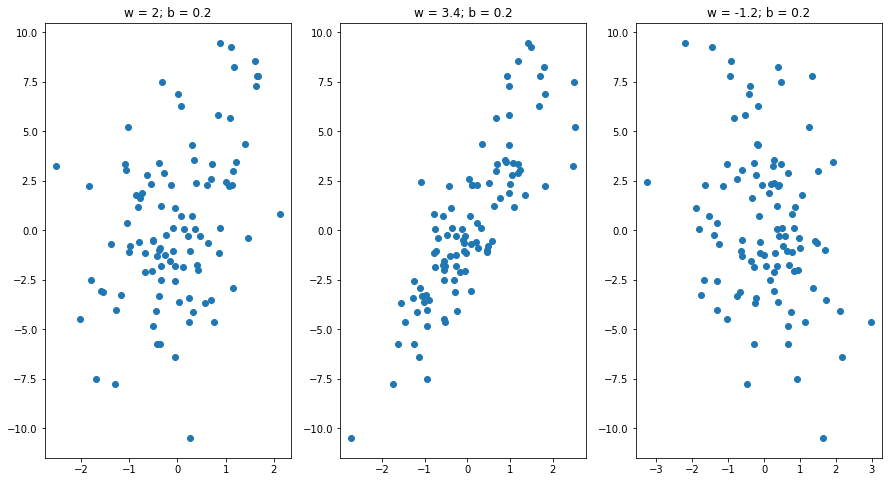

In [ ]:
plt.figure(figsize=(5*(len(weights)),8))
for ind, weight in enumerate(weights):
  plt.subplot(1, len(weights), ind+1) 
  plt.scatter(X[:, ind], y.flatten())
  plt.title(f"w = {weight}; b = {bias}")
plt.show()

## Sampler

In [ ]:
def data_iter(batch_size, features, labels) :
   num_examples = len(features)
   indices = list(range(num_examples))
   random.shuffle(indices)
   for i in range(0, num_examples, batch_size):
     batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
     yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 10

for f ,l in data_iter(batch_size, X, y) :
  print(f, "\n", l)
  break

tensor([[-0.3705,  0.2474,  1.0149],
        [-1.8287,  1.8103,  0.3770],
        [-1.0794,  1.1951, -1.0414],
        [ 0.8490,  0.9718, -0.5291],
        [ 0.5679, -1.5656, -0.2548],
        [-0.0859,  0.3254,  0.8259],
        [-0.3251,  2.5059,  0.4651],
        [ 0.0380, -1.0067,  0.4020],
        [ 1.1462, -1.1213,  1.3524],
        [ 0.6234, -0.0879,  1.4731]]) 
 tensor([[-0.9135],
        [ 2.2423],
        [ 3.3452],
        [ 5.8479],
        [-3.6726],
        [ 0.1319],
        [ 7.5112],
        [-3.6124],
        [-2.9253],
        [-0.6206]])


## Model

In [ ]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):
  return ((y_hat - y.reshape(y_hat.shape)) ** 2) / 2

In [ ]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [ ]:
lr = 0.1
num_epochs = 10
net = linreg
loss = squared_loss

losses = []

w = torch.normal(0, 0.01, size=(3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

for epoch in range(num_epochs) :
  for f, l in data_iter(batch_size, X, y):
    l = loss(net(f, w, b), l)
    l.sum().backward()
    sgd([w, b], lr, batch_size) 
  
  with torch.no_grad() : 
    train_l = loss(net(X, w, b), y)
    losses.append(train_l.mean())
    print(f"epoch {epoch+1}, loss {float(train_l.mean()):f}")

epoch 1, loss 1.086848
epoch 2, loss 0.161734
epoch 3, loss 0.025680
epoch 4, loss 0.004326
epoch 5, loss 0.000784
epoch 6, loss 0.000183
epoch 7, loss 0.000076
epoch 8, loss 0.000057
epoch 9, loss 0.000054
epoch 10, loss 0.000053


## Plots

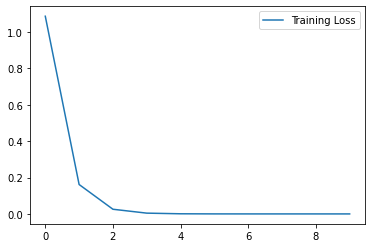

In [ ]:
plt.plot(losses, label="Training Loss")
plt.legend()
plt.show()

## Comparison of real vs Predicted params

In [ ]:
print(weights)
print(w)

[2, 3.4, -1.2]
tensor([[ 2.0010],
        [ 3.3985],
        [-1.2001]], requires_grad=True)


In [ ]:
print(bias)
print(b)

0.2
tensor([0.2003], requires_grad=True)
